In [1]:
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

C:\Users\joaot\OneDrive\Documents\mempool_ai\ai\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the saved SHAP values
shap_values = joblib.load('models/assets/shap_values.pkl')

# Load the test data
X_test_flat = joblib.load('models/assets/X_test_flat.pkl')

# Load the feature names
feature_names = joblib.load('models/assets/feature_names.pkl')

# Create the SHAP Explanation object with feature names
shap_explanation = shap.Explanation(values=shap_values.values, 
                                    base_values=shap_values.base_values,
                                    data=X_test_flat, 
                                    feature_names=feature_names)

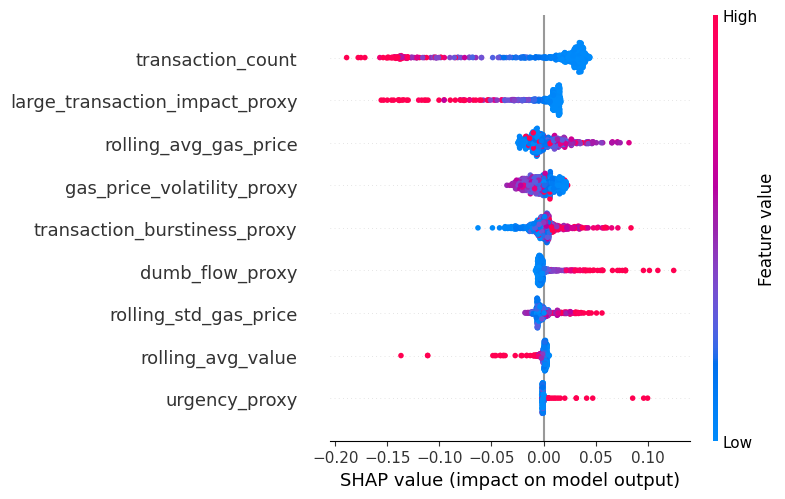

In [3]:
# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(deepcopy(shap_values), deepcopy(X_test_flat), feature_names=feature_names)
plt.show()

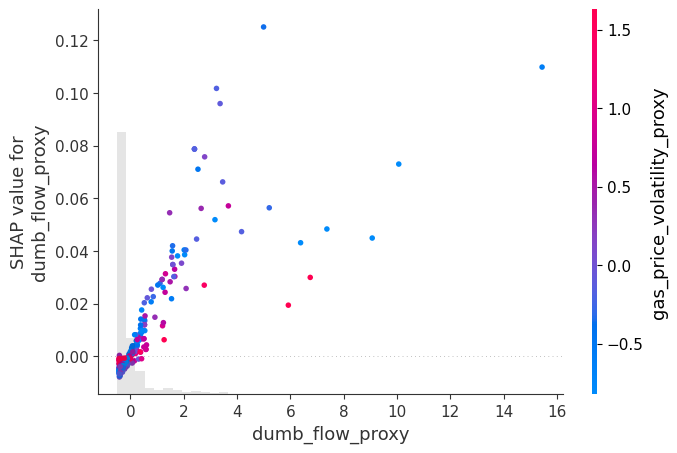

In [4]:
# Dependency plot dumb flow proxy, higher flow increases profit
shap.plots.scatter(deepcopy(shap_explanation)[:, 0], color=shap_explanation)

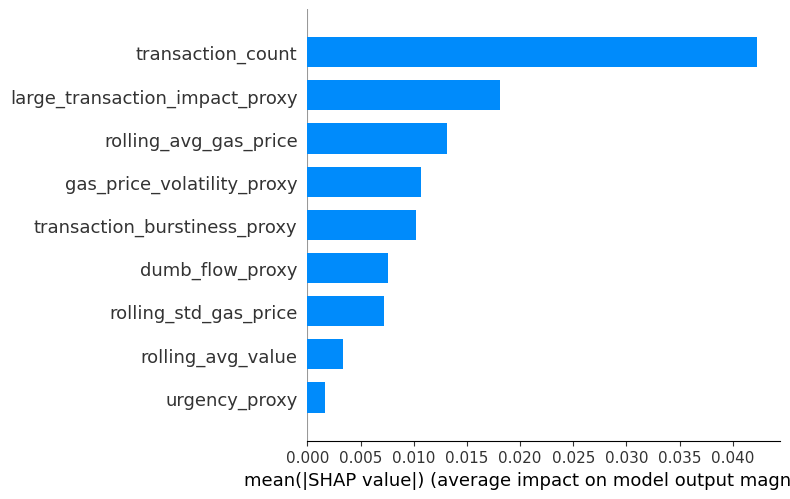

In [8]:
# Bar plot for feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, deepcopy(X_test_flat), feature_names=feature_names, plot_type="bar")
plt.show()

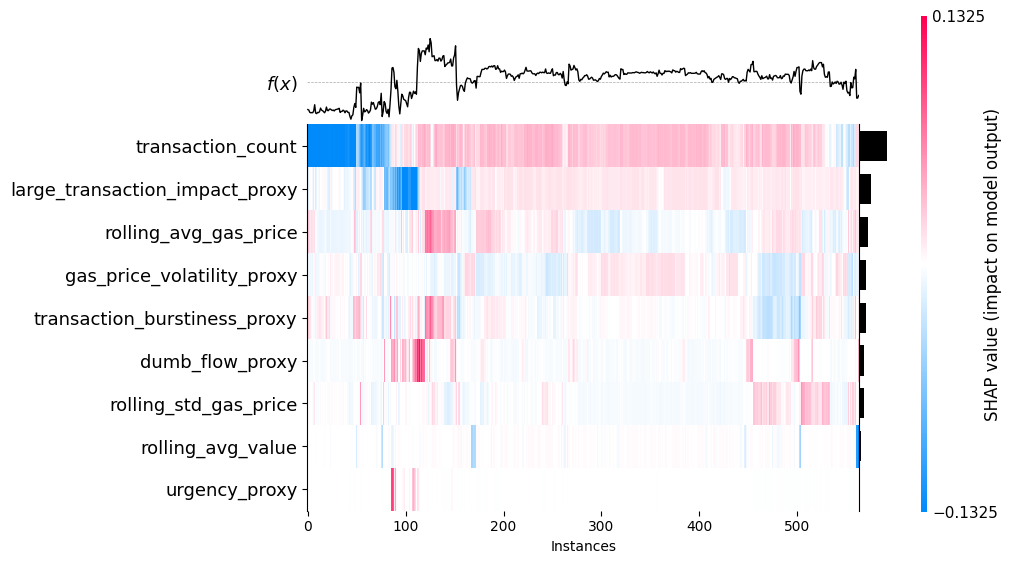

<Axes: xlabel='Instances'>

In [9]:
# Generate the heatmap plot of feature importance impact similarity clusters
shap.plots.heatmap(shap_explanation[:1000])